# Linear regression
## Preparations

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
df = pd.read_csv('diabetes_dirty.csv')

In [3]:
# First look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


## Metadata
Reproduced metadata from the dataset for reference.
### 8.1.2. Diabetes dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

#### Data Set Characteristics

Number of Instances: 442

Number of Attributes: First 10 columns are numeric predictive values

Target: Column 11 is a quantitative measure of disease progression one year after baseline

#### Attribute Information

	age - age in years 
	sex - male or female 
	bmi - body mass index 
	bp - average blood pressure 
	s1 tc - total serum cholesterol 
	s2 ldl - low-density lipoproteins 
	s3 hdl - high-density lipoproteins 
	s4 tch - total cholesterol / HDL 
	s5 ltg - log of serum triglycerides level 
	s6 glu - blood sugar level

## Simple data cleansing
Check for duplicates in the 442 rows

In [4]:
# Check for duplicates
df.drop_duplicates(inplace=True)
df.shape

(442, 11)

No duplicate rows found.

Check for missing values. Above inspection of the dytpes does not find any anomalies, indicating missing values are NaN.

In [5]:
# Check for missing values.
missing_values = df.isnull().sum()
missing_values

AGE            0
SEX            0
BMI            0
BP             0
S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
PROGRESSION    0
dtype: int64

No missing values. The data is ready for analysis.
## Replace categorical variables with dummies
Replace the SEX column with a FEMALE column, where FEMALE = False indicates male (SEX=1) and FEMALE = True indicates female (SEX=2). 

In [6]:
# Get dummy columns
df = pd.get_dummies(data=df, columns=['SEX'])
df.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION,SEX_1,SEX_2
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,False,True
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,True,False
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,False,True
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,True,False
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,True,False


Dummy columns SEX_1 and SEX_2 are now dependent, creating the dummy variable trap. To avoid the trap we remove one of the columns.

In [7]:
# Avoid the dummy variable trap by removing dependent variable SEX_1
df = df.drop(columns='SEX_1')
# Rename SEX_2 column as FEMALE
df.rename(columns={'SEX_2': 'FEMALE'}, inplace=True)
df.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION,FEMALE
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,True
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,False
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,True
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,False
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,False


## Differentiate independent and dependent variables
From the metadata, the dependent data is in column 11, a quantitative measure of disease progression one year after the baseline. The other columns are the independent variables.

In [8]:
# Creating variables for regression
# Independent variables, X
X = df.drop(['PROGRESSION'], axis=1)
# Dependent variable, Y
Y = df['PROGRESSION'].values

## Generate training and test data
80% of the data will be used in the training dataset, with the remaining 20% in the test dataset.

In [9]:
# Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, stratify=X['FEMALE']
)
print(f"Sample rows of training data from X_train:")
display(X_train.sample(5))

print(f"\nSample rows of test data from X_test:")
display(X_test.sample(5))

Sample rows of training data from X_train:


,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,FEMALE
51,65,27.9,103.0,159,96.8,42.0,4.00,4.6151,86,True
219,24,22.5,89.0,141,68.0,52.0,3.00,4.6540,84,False
61,37,26.8,79.0,157,98.0,28.0,6.00,5.0434,96,True
76,40,29.0,115.0,97,47.2,35.0,2.77,4.3041,95,True
47,27,19.6,78.0,128,68.0,43.0,3.00,4.4427,71,False



Sample rows of test data from X_test:


,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,FEMALE
25,30,25.2,83.00,178,118.4,34.0,5.00,4.8520,83,True
322,55,32.1,112.67,207,92.4,25.0,8.28,6.1048,111,True
74,52,26.6,111.00,209,126.4,61.0,3.00,4.6821,109,True
121,66,28.0,101.00,195,129.2,40.0,5.00,4.8598,94,False
58,60,20.4,105.00,198,78.4,99.0,2.00,4.6347,79,False


## Scale the data
AGE, S1 and S6 are integer variables. SEX is a categorical variable. The remaining variables are floats, with varying ranges. To avoid biasing the model, this data needs to be normalised such that in all cases the range of values for the variable is 0 to 1. Otherwise the model may over-emphasize the importance of variables on the basis of their scalar magnitude. For example, S2 may be emphasized over S5 simply because the S2 is typically a much larger number than S5.

The data can be normalized such that all the values are mapped onto the range 0 to 1 preserving the original distribution of the data using MinMaxScaler. Alternatively, the data can be standardized such that the mean is 0 and the standard deviation is -1 using StandardScaler. Since some algorithms assume standardized data, StandardScaler is the better default choice. However, if the data is skewed away from the normal distribution, normalization is a better option since it preserves the shape of the original distribution.

I will create frequency distributions for each column, except SEX, to decide whether to standardize or normalize is most appropriate for this dataset. 

<Figure size 640x480 with 0 Axes>

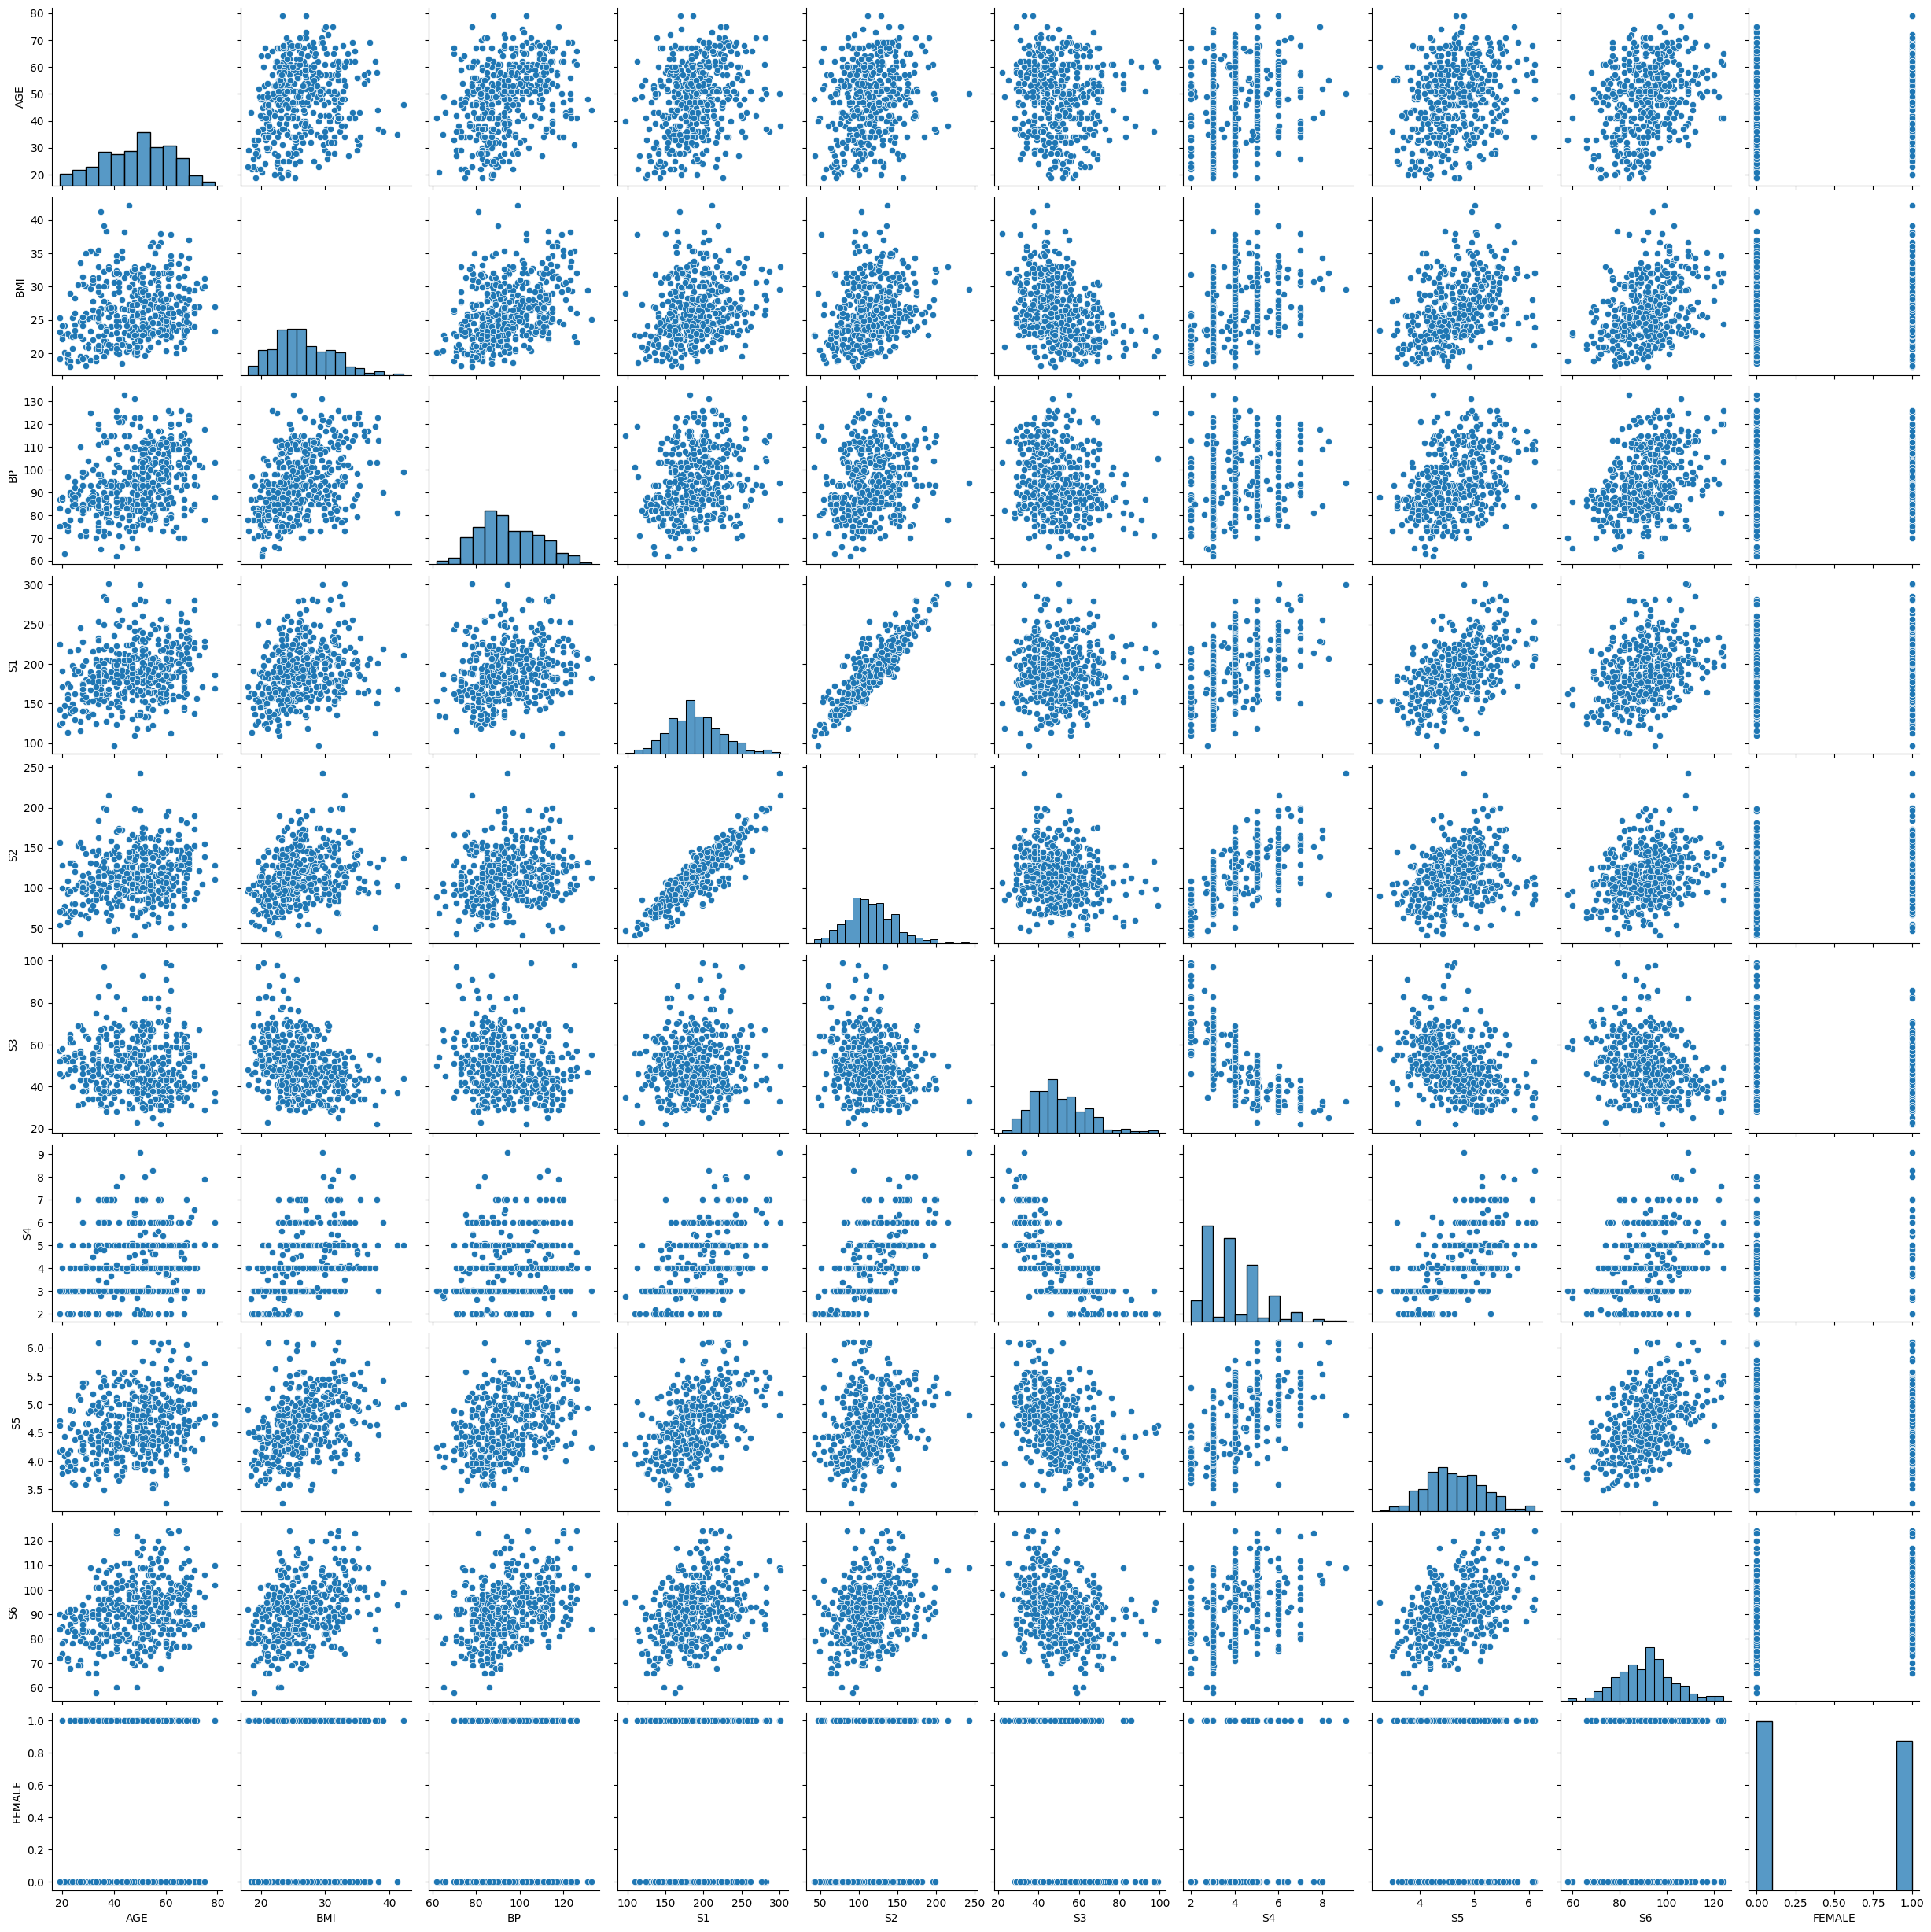

In [10]:
# Show independent variable distributions
fig = plt.figure()
sns.pairplot(data=X)

Most of the distributions have a small skew away from the normal distribution. There are small populations of outliers for S3, S5 and S6. I believe these factors are sufficiently small to neglect them and standardize the data.

The scaling is developed using the training data using the fit_transform method. This method preserves the fit parameters so we can apply the same parameters to the test data. It is important not to contaminate the training set with information from the test data.

In [11]:
# Standardize the training data
std = StandardScaler()
X_train_std = std.fit_transform(X_train)

# Convert to dataframe
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

print(f"Sample data before standardization:")
display(X_train[:5])
print(f"\nSample data after standardization:")
display(X_train_std[:5])

Sample data before standardization:


,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,FEMALE
131,22,19.9,75.0,175,108.6,54.0,3.0,4.1271,72,False
331,71,24.0,84.0,138,85.8,39.0,4.0,4.1897,90,True
249,45,32.0,110.0,224,134.2,45.0,5.0,5.4116,93,False
424,49,27.4,89.0,177,113.0,37.0,5.0,4.9053,97,True
429,37,23.3,88.0,223,142.0,65.0,3.4,4.3567,82,False



Sample data after standardization:


,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,FEMALE
0,-1.998885,-1.442188,-1.442222,-0.388276,-0.220839,0.350673,-0.825340,-0.981391,-1.653603,-0.936835
1,1.723630,-0.542887,-0.791746,-1.443473,-0.962939,-0.872121,-0.033383,-0.859389,-0.100692,1.067424
2,-0.251582,1.211848,1.087407,1.009146,0.612396,-0.383003,0.758573,1.521988,0.158126,-0.936835
3,0.052296,0.202876,-0.430371,-0.331239,-0.077627,-1.035160,0.758573,0.535253,0.503217,1.067424
4,-0.859340,-0.696426,-0.502646,0.980628,0.866272,1.247388,-0.508557,-0.533921,-0.790875,-0.936835


In [12]:
# Apply the same transformation to the test data
X_test_std = std.transform(X_test)

# Convert to dataframe to preserve column names
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

## Multiple linear regression

In [13]:
# Multiple linear regression on the training data
model = LinearRegression()
model.fit(X_train_std, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Intercept and regression coefficients of the model

In [14]:
# display regression coefficients and R-squared value of the model
print(f"The R squared value is {model.score(X_train_std, Y_train):.4f}.")
print(f"The intercept is {model.intercept_:.4f}.")
print(f"The regression coefficients are:\n{model.coef_}")

The R squared value is 0.5182.
The intercept is 151.7989.
The regression coefficients are:
[ -1.13509921  25.40340947  15.81642242 -22.78535999  14.43825275
  -2.91296134   1.98087688  31.61978881   3.27567109 -10.27570046]


## Predictions for the test set

Text(0, 0.5, 'Predicted Y values')

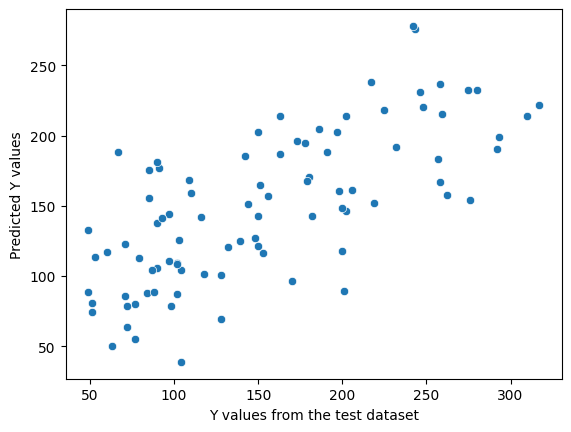

In [15]:
# Make predictions for the test data
Y_pred = model.predict(X_test_std)

# Convert arrays to dataframes
test = pd.DataFrame(Y_test, columns=['Y_test'])
pred = pd.DataFrame(Y_pred, columns=['Prediction'])

# Combine data for scatterplot
combined = pd.concat([test, pred], axis=1)

# Scatterplot
fig = plt.figure()
sns.scatterplot(data=combined, x='Y_test', y='Prediction')

# Add labels
plt.xlabel('Y values from the test dataset')
plt.ylabel('Predicted Y values')

## R squared score

In [16]:
# R squared score
print(f"R2 score: {round(model.score(X_test_std, Y_test), 4)}")

R2 score: 0.5046


## Impact of sex on progression.

I'm interested to see if there are sex differences: medical treatments are generally based on research carried out on male patients (Criado Perez, 2019). 

Reference: Criado Perez, C. (2019). Invisible Women: Exposing Data Bias in a World Designed for Men. London, England: Chatto & Windus.

In [17]:
# Find the counts of unique values in FEMALE
print(df['FEMALE'].value_counts())

FEMALE
False    235
True     207
Name: count, dtype: int64


The dataset contains similar proportions of females and males.


<Figure size 640x480 with 0 Axes>

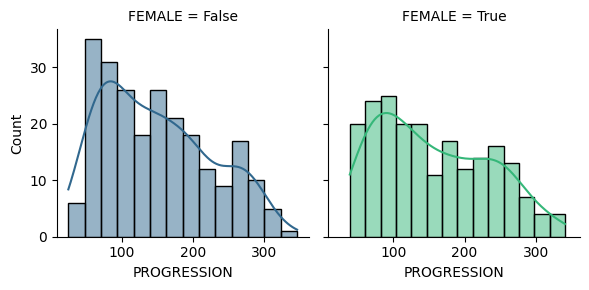

In [18]:
# Facet grid of PROGRESSION histogram by FEMALE column
plt.figure()
fg = sns.FacetGrid(
    df, col="FEMALE", hue="FEMALE", margin_titles=True, palette='viridis'
)
fg.map(sns.histplot, "PROGRESSION", kde=True, bins=14)

The PROGRESSION distributions have some differences:
* There are fewer males with the lowest progression score than females
* The distribution for males is wedge-shaped, with an almost linear descrease in count as PROGRESSION increases
* The distribution for females is almost bimodal, with modes at approximately 100 and 250 for PROGRESSION. There is a hint of the second mode in the male distribution but it is less clear.

I will develop separate models based on FEMALE and compare the results to see if there are different relationships between the S1-6 variables for male and female biologies.

## Functionalize the modeling process
To build separate models for males and females, we'll create reusable functions.

In [19]:
def train_and_evaluate_model(X, y, test_size=0.2, model_name="Model"):
    '''
    Train and evaluate a linear regression model. The function can handle
    cases where FEMALE column is present or not, and further if entries in
    FEMALE vary or are constant. This covers the four scenarios of the models
    to be tested. In the original data, FEMALE is present and varies. Then
    there are male and female only datasets, where FEMALE is present but is
    constant to indicate either males or females only. In the last dataset, the
    FEMALE column is eliminated to demonstrate the impact of removing sex
    information from the dataset entirely.
    
    Parameters:
        X = input feature data
        y = target data
        test_size = proportion of data to assign to the test dataset,
        default value 0.2
        model_name = string, default value Model
    Output:
        results = dictionary containing model parameters (model, scaler),
        datasets (X_train, X_test, y_train, y_test), predictions (y_pred_train,
        y_pred_test), r2 regression coefficients (train_r2, test_r2) and the
        feature coefficients in a dataframe (coefficients).
    '''
    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}")

    # Split data based on the status of FEMALE column
    if "FEMALE" in X.columns and X["FEMALE"].nunique() > 1:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, shuffle=True, stratify=X["FEMALE"]
        )
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, shuffle=True
        )

    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")

    # Standardize and transform data
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
    X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

    # Create and fit model to training data
    model = LinearRegression()
    model.fit(X_train_std, y_train)

    # Make predictions from training and test data
    y_pred_train = model.predict(X_train_std)
    y_pred_test = model.predict(X_test_std)

    # Obtain regression coefficient r2 for training and test data
    train_r2 = model.score(X_train_std, y_train)
    test_r2 = model.score(X_test_std, y_test)

    print(f"\nTraining R² score: {train_r2:.4f}")
    print(f"Test R² score: {test_r2:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

    # Compile results dictionary
    results = {
        "model": model,
        "scaler": scaler,
        "X_train": X_train_std,
        "X_test": X_test_std,
        "Y_train": y_train,
        "Y_test": y_test,
        "Y_pred_train": y_pred_train,
        "Y_pred_test": y_pred_test,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "coefficients": pd.DataFrame(
            {"Feature": X_train.columns, "Coefficient": model.coef_}
        ),
    }
    return results

In [20]:
def plot_predictions(results, model_name="Model"):
    '''
    Create a scatter plot to compare actual vs predicted values.
    Parameters:
        results = dictionary output of train_and_evaluate_model
        model_name = string, default Model
    Output:
        displayed scatter plot
    '''
    # Prepare the figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the scatter plot
    ax.scatter(
        results["Y_test"],
        results["Y_pred_test"],
        alpha=0.6,
        edgecolors="k",
        linewidth=0.5,
        label="Predictions",
    )

    # Define axes and plot
    min_val = min(results["Y_test"].min(), results["Y_pred_test"].min())
    max_val = max(results["Y_test"].max(), results["Y_pred_test"].max())
    ax.plot(
        [min_val, max_val], [min_val, max_val], "r--", lw=2, label="Perfect"
    )

    # Add title, labels and legend
    title = (
    f"{model_name} - Predictions vs Actual\n"
    f"R² = {results['test_r2']:.4f}"
    )
    
    ax.set_title(title, fontsize=14)
    
    ax.set_xlabel("Actual Y values", fontsize=12)
    ax.set_ylabel("Predicted Y values", fontsize=12)
    
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Display
    plt.tight_layout()

In [22]:
def compare_models(results_dict):
    '''
    Compare coefficients from multiple models side by side in a grouped bar
    chart. The function identifies the features common to all the models. The
    common features are the only ones included in the bar chart.
    Parameters:
        results_dict = dictionary output of train_and_evaluate_model, compiled
        for all models to be compared
    Outputs:
        1) displayed dataframe comparing the r2 coefficients for train and test
        data for each model
        2) displayed grouped bar chart    
    '''
    print(f"\n{'='*60}")
    print("MODEL COMPARISON")
    print(f"{'='*60}")

    # Extract relevant information from results_dict and store in a list
    comparison_data = []
    for name, results in results_dict.items():
        comparison_data.append(
            {
                "Model": name,
                "Sample Size": len(results["Y_train"]) + len(results["Y_test"]),
                "Train R²": f"{results['train_r2']:.4f}",
                "Test R²": f"{results['test_r2']:.4f}",
                "Intercept": f"{results['model'].intercept_:.4f}",
            }
        )

    # Convert the list to dataframe and display it
    comparison_df = pd.DataFrame(comparison_data)
    display(comparison_df)

    # Create sets of the features in each model
    feature_sets = [
        set(results["coefficients"]["Feature"])
        for results in results_dict.values()
    ]
    # Identify the common features for plotting. Only common features will be
    # displayed.
    common_features = sorted(set.intersection(*feature_sets))

    # Prepare data for seaborn
    plot_data = []
    for name, results in results_dict.items():
        coeff_df = results["coefficients"]
        for feat in common_features:
            mask = coeff_df["Feature"] == feat
            coeff_value = coeff_df[mask]["Coefficient"].values[0]
            plot_data.append(
                {"Feature": feat, "Coefficient": coeff_value, "Model": name}
            )

    plot_df = pd.DataFrame(plot_data)

    #Prepare figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create bar plot
    sns.barplot(
        data=plot_df,
        x="Feature",
        y="Coefficient",
        hue="Model",
        palette="Set2",
        ax=ax,
        edgecolor="black"
    )

    # Add labels and titles
    ax.set_xlabel("Features", fontsize=12)
    ax.set_ylabel("Coefficient Value", fontsize=12)
    ax.set_title(
        "Coefficient Comparison Across Models (Common Features)", fontsize=14
    )

    # Set grid
    ax.grid(True, alpha=0.3, axis="y")
    ax.axhline(y=0, color="k", linestyle="-", linewidth=0.5)

    # Display
    plt.tight_layout()

## Build models for different populations

We already have a model for all patients WITH sex information (the first model we built).
Now we'll build three additional models WITHOUT the FEMALE column to compare:
- All patients (without sex information)
- Male patients only
- Female patients only

In [23]:
# Prepare data for all patients WITHOUT sex information
X_all_no_sex = df.drop(['PROGRESSION', 'FEMALE'], axis=1)
Y_all_no_sex = df['PROGRESSION'].values

# Prepare data for male patients only (SEX_1 = 1, so FEMALE = False)
df_male = df[~df['FEMALE']].copy()
X_male = df_male.drop(['PROGRESSION', 'FEMALE'], axis=1)
Y_male = df_male['PROGRESSION'].values

# Prepare data for female patients only (SEX_2 = 2, so FEMALE = True)
df_female = df[df['FEMALE']].copy()
X_female = df_female.drop(['PROGRESSION', 'FEMALE'], axis=1)
Y_female = df_female['PROGRESSION'].values

print(f"Total patients: {len(df)}")
print(f"Male patients: {len(df_male)}")
print(f"Female patients: {len(df_female)}")

Total patients: 442
Male patients: 235
Female patients: 207


In [24]:
# Train models for each population (without sex information)
results_all_no_sex = train_and_evaluate_model(
    X_all_no_sex, Y_all_no_sex, model_name="All Patients (No Sex Info)"
)
results_male = train_and_evaluate_model(
    X_male, Y_male, model_name="Male Patients"
)
results_female = train_and_evaluate_model(
    X_female, Y_female, model_name="Female Patients"
)


Training All Patients (No Sex Info)
Training set size: 353
Test set size: 89

Training R² score: 0.5233
Test R² score: 0.3802
Intercept: 152.3541

Training Male Patients
Training set size: 188
Test set size: 47

Training R² score: 0.5062
Test R² score: 0.2992
Intercept: 152.8351

Training Female Patients
Training set size: 165
Test set size: 42

Training R² score: 0.6150
Test R² score: 0.5242
Intercept: 156.8970


In [25]:
# Create results dictionary for the original model (with sex information)
# This repackages the existing model to match the format of the
# function output
results_all_with_sex = {
    "model": model,
    "scaler": std,
    "X_train": X_train_std,
    "X_test": X_test_std,
    "Y_train": Y_train,
    "Y_test": Y_test,
    "Y_pred_train": model.predict(X_train_std),
    "Y_pred_test": Y_pred,
    "train_r2": model.score(X_train_std, Y_train),
    "test_r2": model.score(X_test_std, Y_test),
    "coefficients": pd.DataFrame(
        {"Feature": X_train_std.columns, "Coefficient": model.coef_}
    ),
}

print(f"Test R² score: {results_all_with_sex['test_r2']:.4f}")
print(f"Training R² score: {results_all_with_sex['train_r2']:.4f}")

Test R² score: 0.5046
Training R² score: 0.5182


### Visualize predictions for each model

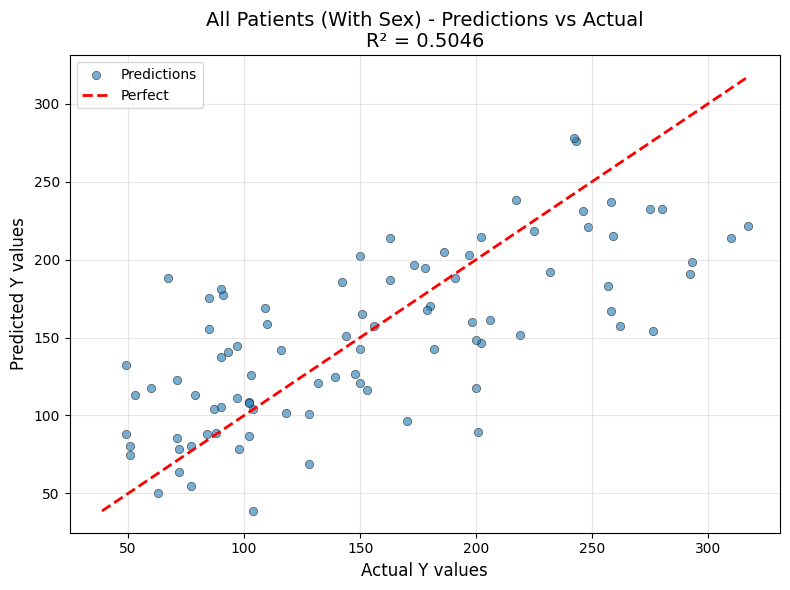

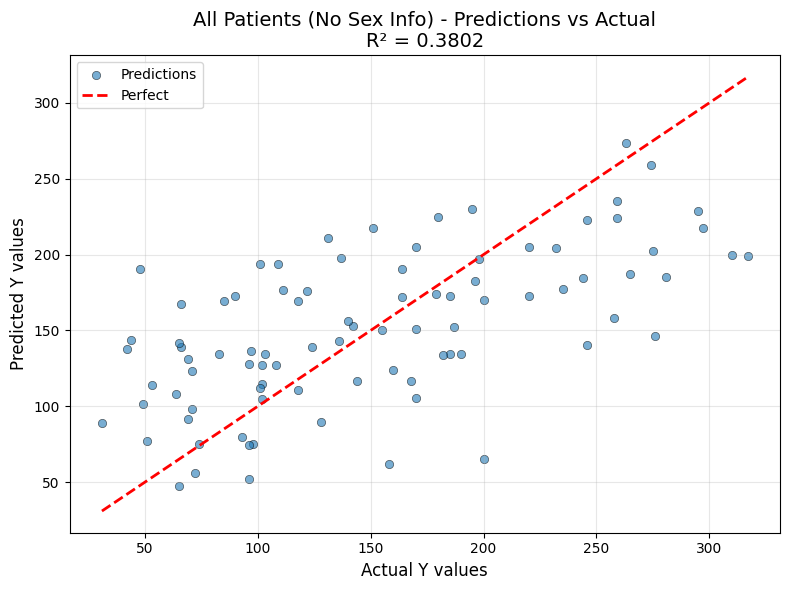

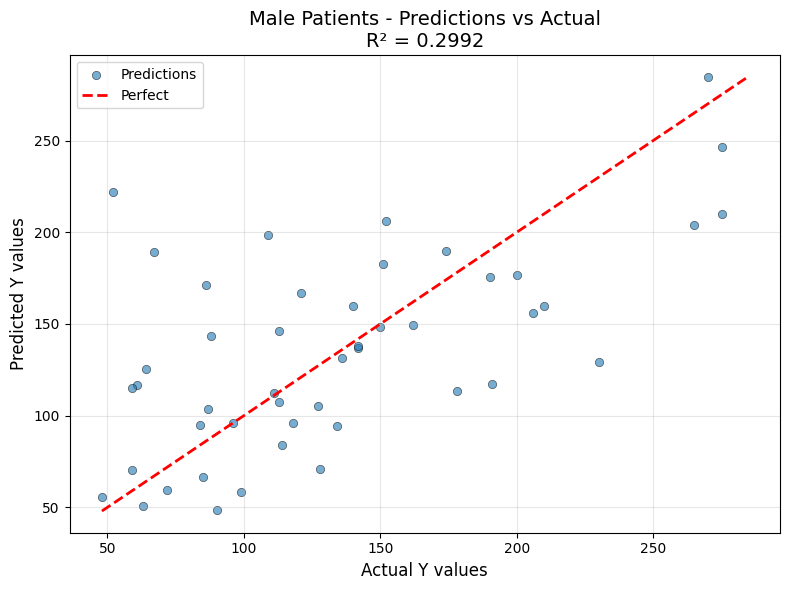

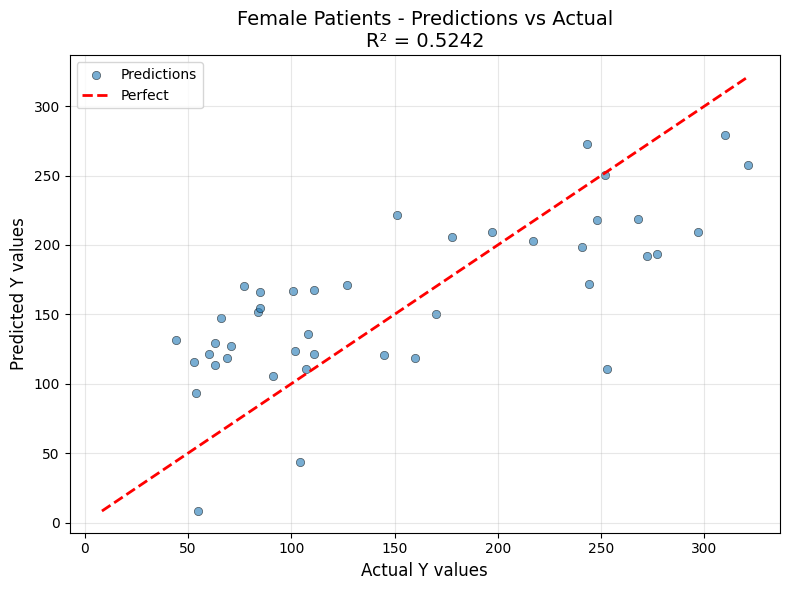

In [26]:
# Plot predictions for all models
plot_predictions(results_all_with_sex, "All Patients (With Sex)")
plot_predictions(results_all_no_sex, "All Patients (No Sex Info)")
plot_predictions(results_male, "Male Patients")
plot_predictions(results_female, "Female Patients")

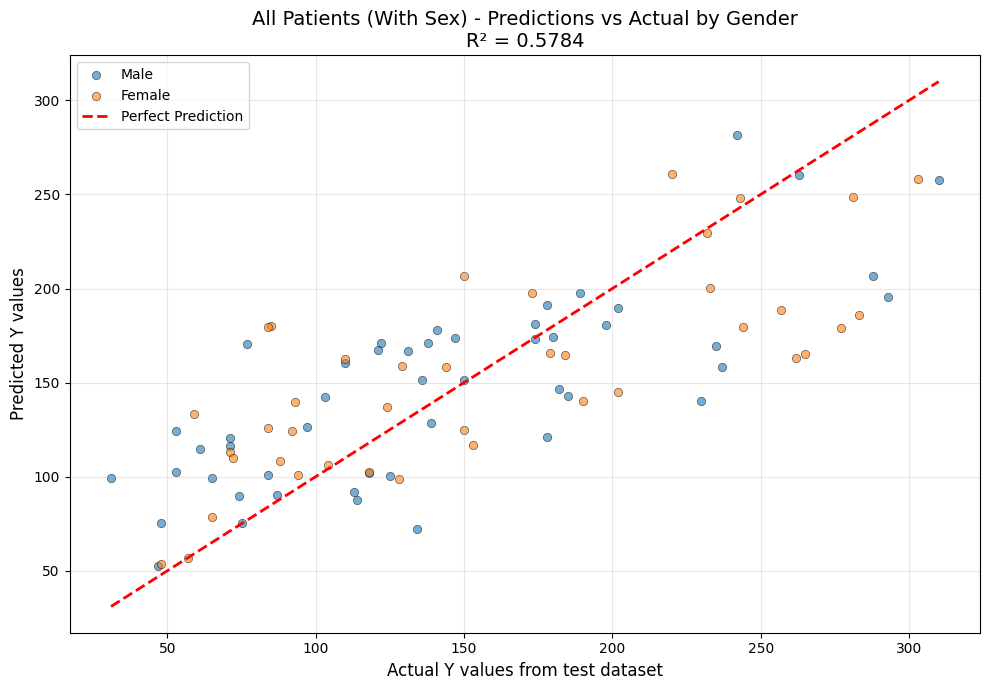

In [26]:
# Create enhanced visualization for All Patients (With Sex) colored by gender
fig, ax = plt.subplots(figsize=(10, 7))

# Combine test data with predictions and gender information
# Get the FEMALE values for the test set indices
test_indices = results_all_with_sex['X_test'].index
female_values = X.loc[test_indices, 'FEMALE']

# Create dataframe for plotting
plot_data = pd.DataFrame({
    'Y_test': results_all_with_sex['Y_test'],
    'Y_pred': results_all_with_sex['Y_pred_test'],
    'Gender': female_values.map({False: 'Male', True: 'Female'})
})

# Create scatter plot with different colors for males and females
colors = {'Male': '#1f77b4', 'Female': '#ff7f0e'}
for gender, color in colors.items():
    mask = plot_data['Gender'] == gender
    ax.scatter(plot_data[mask]['Y_test'],
              plot_data[mask]['Y_pred'],
              alpha=0.6,
              edgecolors='k',
              linewidth=0.5,
              label=gender,
              color=color)

# Add diagonal line (perfect predictions)
min_val = min(plot_data['Y_test'].min(), plot_data['Y_pred'].min())
max_val = max(plot_data['Y_test'].max(), plot_data['Y_pred'].max())
ax.plot(
    [min_val, max_val], [min_val, max_val], 
    'r--', lw=2, label='Perfect Prediction'
)

# Labels and title
ax.set_xlabel('Actual Y values from test dataset', fontsize=12)
ax.set_ylabel('Predicted Y values', fontsize=12)
title = 'All Patients (With Sex) - Predictions vs Actual by Gender\n'
title += f'R² = {results_all_with_sex["test_r2"]:.4f}'
ax.set_title(title, fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

### Compare all models: feature coefficients

In [36]:
# Extract coefficients from each model
coeff_with_sex = results_all_with_sex["coefficients"].set_index("Feature")[
    "Coefficient"
]
coeff_no_sex = results_all_no_sex["coefficients"].set_index("Feature")[
    "Coefficient"
]
coeff_male = results_male["coefficients"].set_index("Feature")["Coefficient"]
coeff_female = results_female["coefficients"].set_index("Feature")[
    "Coefficient"
]

# Combine into a single dataframe
combined_coeff = pd.concat(
    [coeff_with_sex, coeff_no_sex, coeff_male, coeff_female],
    axis=1,
    keys=[
        "All Patients (With Sex)",
        "All Patients (No Sex)",
        "Male Patients",
        "Female Patients",
    ],
)

# Sort by index (feature name)
combined_coeff = combined_coeff.sort_index()

# Format to 4 decimal places
combined_coeff = combined_coeff.map("{:.4f}".format)

print("Model Coefficients Comparison:")
display(combined_coeff)

Model Coefficients Comparison:


,All Patients (With Sex),All Patients (No Sex),Male Patients,Female Patients
Feature,,,,
AGE,-1.1351,-0.0261,-9.3824,7.5298
BMI,25.4034,24.3534,21.0162,30.0582
BP,15.8164,17.9916,16.7385,16.7874
FEMALE,-10.2757,nan,nan,nan
S1,-22.7854,-32.7921,-76.2152,-46.8160
S2,14.4383,21.0452,54.0010,25.1041
S3,-2.9130,3.0626,21.1742,15.1113
S4,1.9809,2.4686,16.5652,8.9842
S5,31.6198,35.3338,52.4398,40.4118


### Compare all models


MODEL COMPARISON


,Model,Sample Size,Train R²,Test R²,Intercept
0,All Patients (With Sex),442,0.5182,0.5046,151.7989
1,All Patients (No Sex),442,0.5233,0.3802,152.3541
2,Male Patients,235,0.5062,0.2992,152.8351
3,Female Patients,207,0.6150,0.5242,156.8970


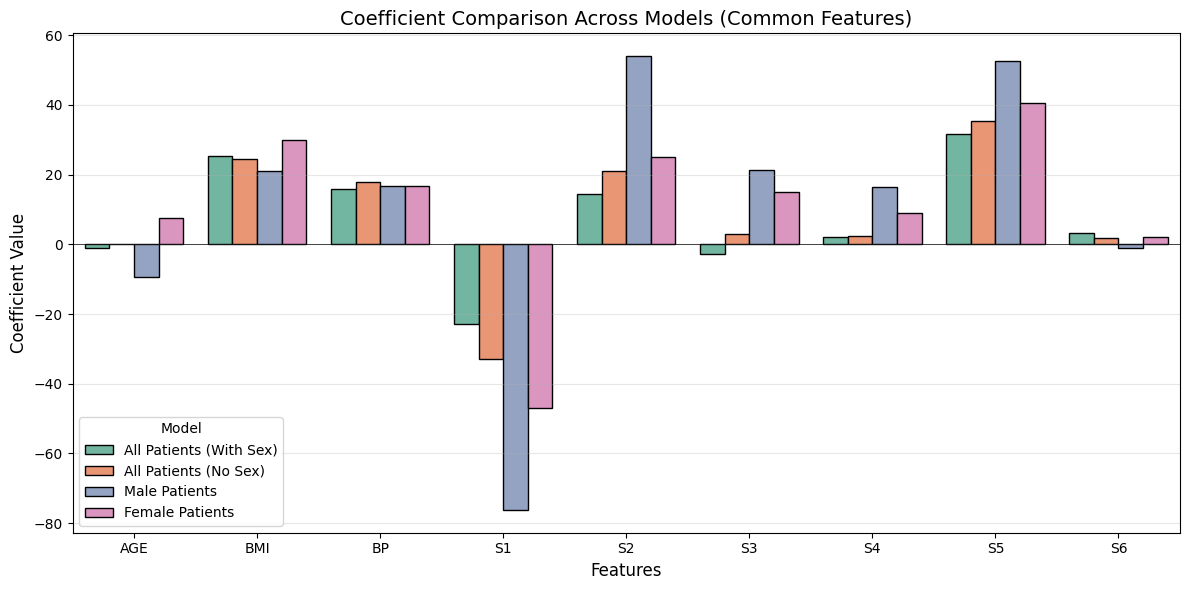

In [30]:
# Compare all four models
model_results = {
    'All Patients (With Sex)': results_all_with_sex,
    'All Patients (No Sex)': results_all_no_sex,
    'Male Patients': results_male,
    'Female Patients': results_female
}

compare_models(model_results)

### Compare residuals for each model

In [33]:
# Calculate residuals and collect in a dataframe
residuals_data = []
for name, results in model_results.items():
    residuals = results["Y_test"] - results["Y_pred_test"]
    for residual in residuals:
        residuals_data.append({"Model": name, "Residual": residual})

residuals_df = pd.DataFrame(residuals_data)

In [34]:
# Display residual summary statistics
print("\nResidual Summary Statistics:")
print("=" * 60)
for name, results in model_results.items():
    residuals = results["Y_test"] - results["Y_pred_test"]
    print(f"\n{name}:")
    print(f"  Mean: {np.mean(residuals):8.2f}")
    print(f"  Std:  {np.std(residuals):8.2f}")
    print(f"  MAE:  {np.mean(np.abs(residuals)):8.2f}")
    print(f"  RMSE: {np.sqrt(np.mean(residuals**2)):8.2f}")


Residual Summary Statistics:

All Patients (With Sex):
  Mean:     4.37
  Std:     50.73
  MAE:     40.04
  RMSE:    50.92

All Patients (No Sex):
  Mean:    -0.34
  Std:     58.90
  MAE:     48.06
  RMSE:    58.90

Male Patients:
  Mean:    -2.06
  Std:     51.73
  MAE:     38.70
  RMSE:    51.77

Female Patients:
  Mean:    -8.66
  Std:     57.98
  MAE:     51.06
  RMSE:    58.62


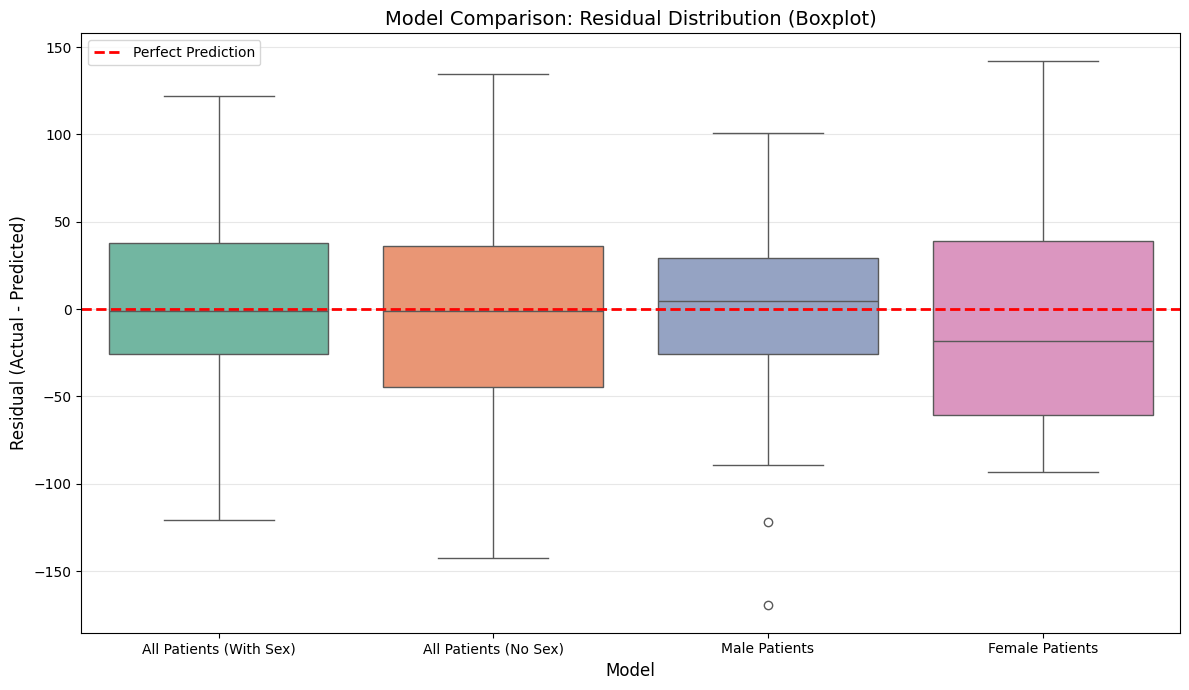

In [35]:
# Residual comparison across models using boxplots
# Prepare figure
fig, ax = plt.subplots(figsize=(12, 7))

# Create boxplots
sns.boxplot(
    data=residuals_df,
    x="Model",
    y="Residual",
    ax=ax,
    hue="Model",
    palette="Set2",
)

# Add perfect prediction line
ax.axhline(
    y=0, color="red", linestyle="--", linewidth=2, 
    label="Perfect Prediction"
)

# Add labels, title and legend
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Residual (Actual - Predicted)", fontsize=12)
ax.set_title("Model Comparison: Residual Distribution (Boxplot)", fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3, axis="y")

# Display
plt.tight_layout()

## Discussion: Model Comparison Results

### Key Findings

**1. Impact of Sex Information on Model Performance**
- **All Patients (With Sex)** vs **All Patients (No Sex)**: the higher R² score when sex information is includes, demonstrates the predictive value of sex information.
- The FEMALE coefficient in the "With Sex" model quantifies how much diabetes progression differs between males and females (all else being equal).

**2. Gender-Specific Model Performance**
- The separate **Male Patients** and **Female Patients** models have significantly different coefficients, indicating the models themselves are different.
- The **Female Patients** model has an R² score slightly higher than the **All Patients (With Sex)** model, so the female specific model is an improvement for females.
- However, the **Male Patients** model has the worst R² score, even lower than **All Patients (No Sex)**. With these input features, the male specific model performs badly, which suggests other features are important in males but not females eg testorone. 
- This suggests that the relationships between predictors (BMI, blood pressure, serum measurements) and disease progression differ between males and females.

**3. Coefficient Patterns**
Examining the coefficient comparison chart and individual coefficient tables reveals:
- S1 and S5 are most predictive of disease progression (highest absolute values)
- S2 is much more important in the **Male Patients** model than in the others
- blood pressure is not important in any of the models
- BMI is more important in **Female Patients** and least important in **Male Patients**, but is always a relevant parameter with a coefficient modulus of 0.2-0.3

**4. Sample Size Considerations**
- Gender-specific models have smaller sample sizes (~200 patients each vs ~440 for combined models)
- Smaller samples can lead to higher variance in model estimates
- For a fair comparison either half of the training data should be removed from from the combined models

### Clinical Implications
The models show clear differences between male and female patients. More research is needed on a larger population to confirm this hypothesis. If the hypothesis is proven, researchers and doctors should develop appropriate testing and treatment protocols dependent on sex.

The bimodal distribution observed in female patients' progression scores suggests there may be distinct subpopulations within the female cohort. This could indicate:
- Different disease progression pathways
- Hormonal or biological factors specific to females
- Need for more personalized treatment approaches

The wedge-shaped distribution for males suggests a more uniform progression pattern, which may simplify treatment protocols for male patients.

### Conclusion

This analysis demonstrates the importance of considering sex differences in medical research. By comparing models with and without sex information, and building gender-specific models, we can better understand whether treatment strategies should be personalized based on patient sex - directly addressing the research bias identified by Criado Perez (2019).